<a href="https://colab.research.google.com/github/Aadityasindhuu/Aadityasindhuu/blob/main/3rd_ANN_MODEL_USING_HOUSE_PREDICTION_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing.csv


In [ ]:
 data = pd.read_csv('Housing.csv')

In [ ]:
# Separate features and target variable
X = data.drop('price', axis=1)  # Update 'target_variable_name' with your target column name
y = data['area']

In [ ]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Single output neuron for regression
])

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Root Mean Squared Error (RMSE): {np.sqrt(loss)}')

Epoch 1/50
11/11 [==============================] - 2s 23ms/step - loss: 32807632.0000 - val_loss: 25864840.0000
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 32799462.0000 - val_loss: 25857234.0000
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 32790234.0000 - val_loss: 25848274.0000
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 32778740.0000 - val_loss: 25836718.0000
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 32763640.0000 - val_loss: 25821472.0000
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 32744030.0000 - val_loss: 25801292.0000
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 32717962.0000 - val_loss: 25775704.0000
Epoch 8/50
11/11 [==============================] - 0s 7ms/step - loss: 32684568.0000 - val_loss: 25743680.0000
Epoch 9/50
11/11 [==============================] - 0s 6ms/step - loss: 32643566.0000 - val_loss: 25703

Epoch 1/50
11/11 [==============================] - 3s 75ms/step - loss: 11432702.0000 - val_loss: 8615039.0000
Epoch 2/50
11/11 [==============================] - 0s 29ms/step - loss: 10958669.0000 - val_loss: 8271823.5000
Epoch 3/50
11/11 [==============================] - 0s 36ms/step - loss: 10515953.0000 - val_loss: 7928889.5000
Epoch 4/50
11/11 [==============================] - 0s 26ms/step - loss: 10051304.0000 - val_loss: 7600940.5000
Epoch 5/50
11/11 [==============================] - 0s 26ms/step - loss: 9620050.0000 - val_loss: 7270551.5000
Epoch 6/50
11/11 [==============================] - 0s 38ms/step - loss: 9181800.0000 - val_loss: 6953309.0000
Epoch 7/50
11/11 [==============================] - 0s 37ms/step - loss: 8765775.0000 - val_loss: 6643726.0000
Epoch 8/50
11/11 [==============================] - 0s 31ms/step - loss: 8354471.5000 - val_loss: 6344532.5000
Epoch 9/50
11/11 [==============================] - 0s 25ms/step - loss: 7940766.0000 - val_loss: 6064126.50

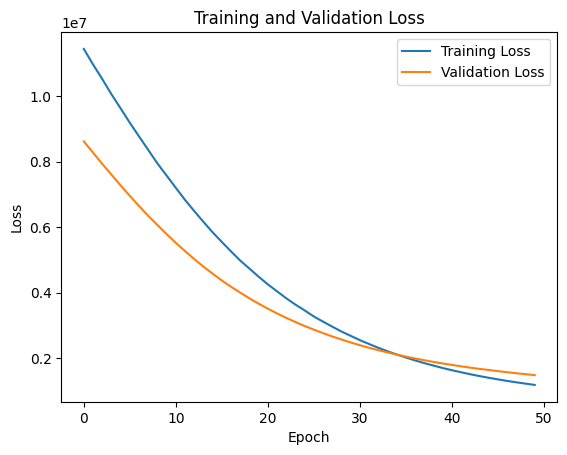

4/4 [==============================] - 0s 9ms/step


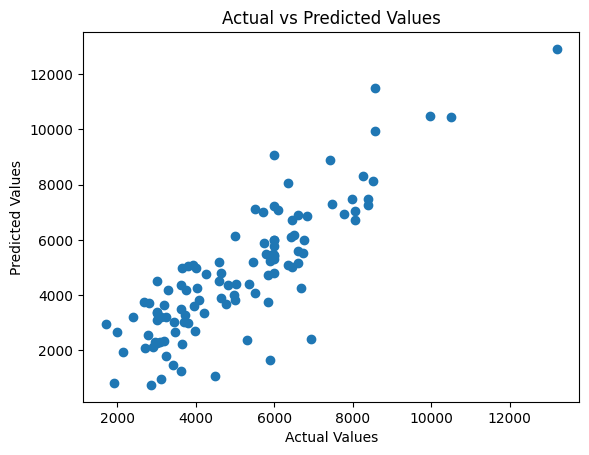

In [ ]:
import matplotlib.pyplot as plt

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Root Mean Squared Error (RMSE): {np.sqrt(loss)}')

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Make predictions on test data
predictions = model.predict(X_test_scaled).flatten()

# Plotting actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
